Importing libraries

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import pandas as pd

Creating a function to generate an ARMA process time series

In [17]:
def gen_series(ar, ma, length):
    ar_process = ArmaProcess(ar, ma)
    np.random.seed(400)

    X= ar_process.generate_sample(nsample=length)
    return X

# AR model

For AR process generating a AR time series

In [22]:
ar_params = np.array([0.5, 0.46]) # phi_1 = 0.4, phi_2 = 0.2
ma_params = np.array([]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

Creating a function to plot time series

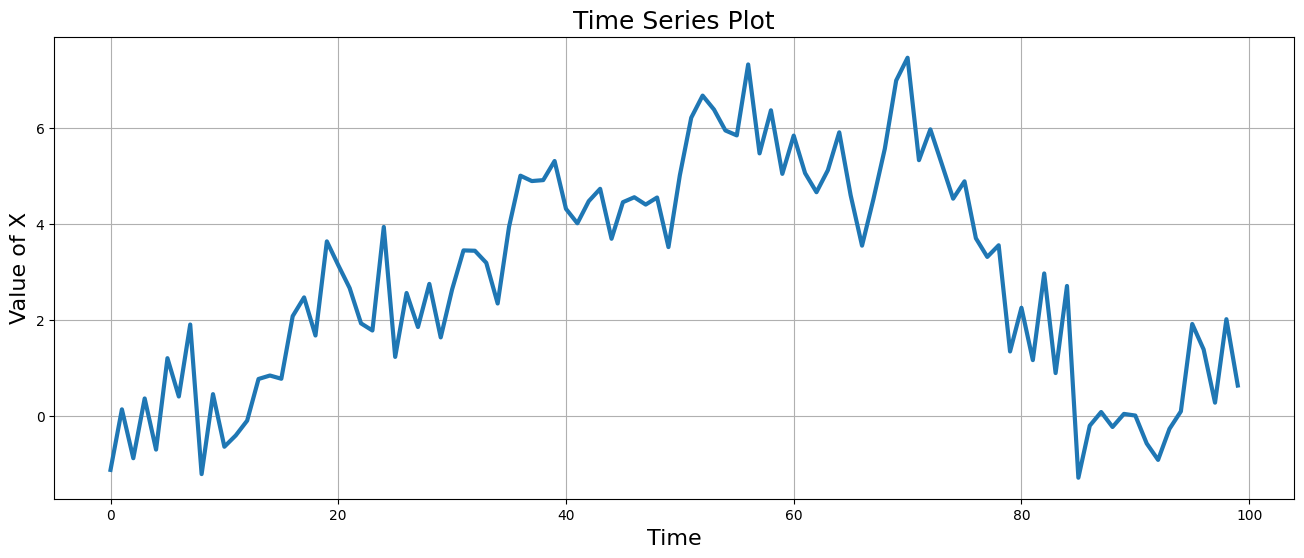

In [23]:
def plot_series(X, title='Time Series Plot', y_label='Value of X', figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=18)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.grid()
    plt.show()

plot_series(X)

Creating function to plot ACF and PACF plot

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


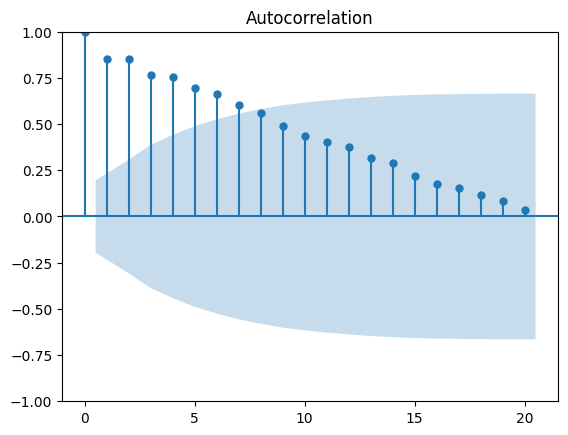

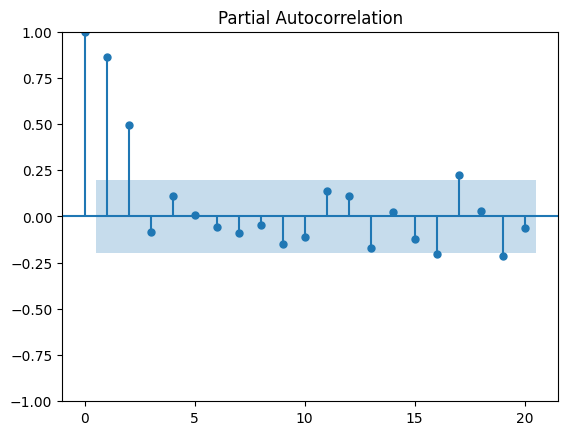

In [24]:
def plotCorr(x):
    plot_acf(x)
    plot_pacf(x)

plotCorr(X)

As we can see from PACF plot the PACF value drops abruptly arfet 2 lag. Thus it is a AR(2) model

# Generating Train and test set

In [32]:
train_set = X[:98]
test_set = X[98:]

In [38]:
test_set

array([2.0096084 , 0.62746003])

fiting an AR model

In [68]:
#create the model
model = ARIMA(train_set, order=(2,0,0))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -139.286
Date:                Fri, 27 Oct 2023   AIC                            286.572
Time:                        21:52:30   BIC                            296.912
Sample:                             0   HQIC                           290.755
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9337      1.357      1.425      0.154      -0.726       4.593
ar.L1          0.4623      0.088      5.249      0.000       0.290       0.635
ar.L2          0.4788      0.099      4.848      0.0

Creating a function to make prediction

In [69]:
def pred(model, test):
    predictions = model.predict(start = test.index[0], end = test.index[-1])
    return predictions

predictions = pred(model_fit, pd.Series(test_set))
predictions

array([ 1.93366895, -0.78407733])

In [70]:
residuals = test_set - predictions
residuals

array([0.07593945, 1.41153736])

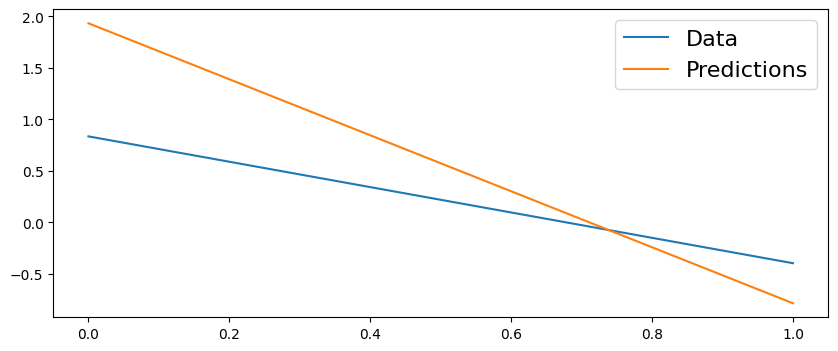

In [71]:
plt.figure(figsize=(10,4))

plt.plot(X[-2:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

# MA Model

In [62]:
ar_params = np.array([]) # phi_1 = 0.4, phi_2 = 0.2
ma_params = np.array([0.4, .3]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

X = gen_series(ar, ma, 100)

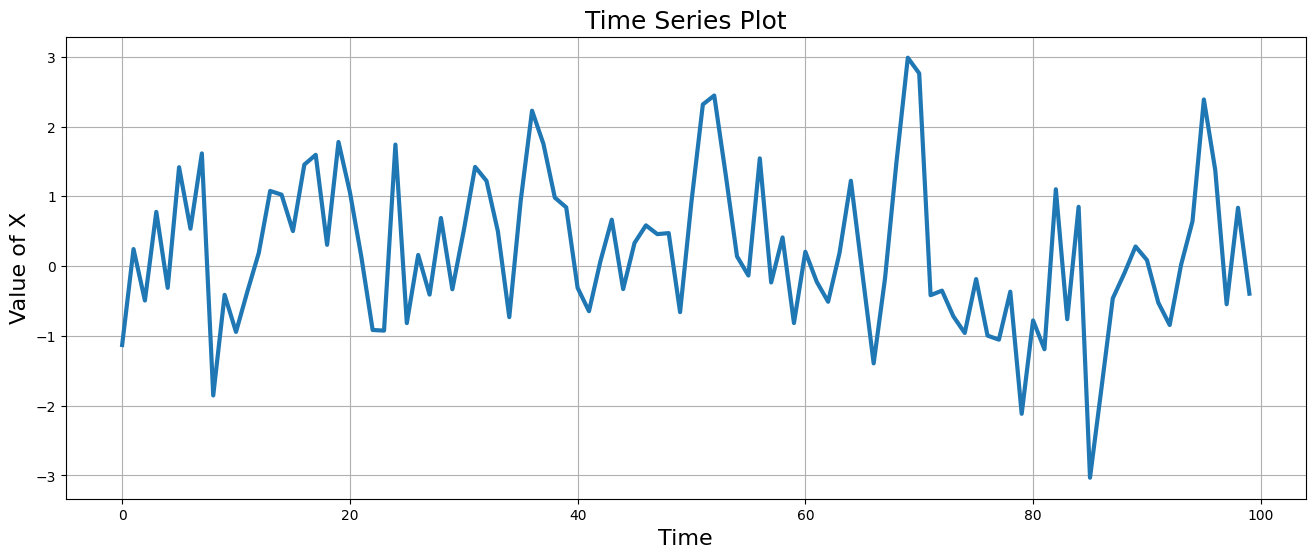

c:\Users\dell\OneDrive\Documents\FuseMachine AI fellowship\Assignment Deep learning\assignment\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


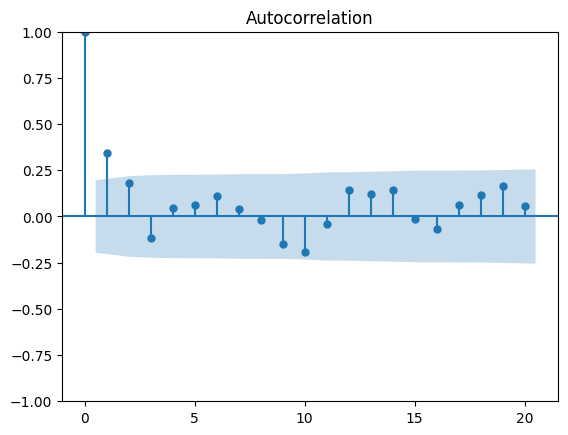

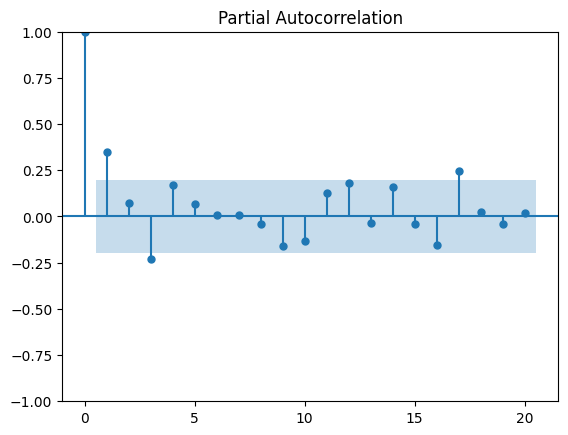

In [63]:
plot_series(X)
plotCorr(X)

ACF drops abruptly after first lag but PACF doesnot. So, it is MA model

In [74]:
train_set = X[:98]
test_set = X[98:]

In [75]:
#create the model
model = ARIMA(train_set, order=(0,0,2))
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -138.066
Date:                Fri, 27 Oct 2023   AIC                            284.132
Time:                        21:54:21   BIC                            294.472
Sample:                             0   HQIC                           288.315
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.199      1.008      0.314      -0.189       0.590
ma.L1          0.4532      0.112      4.063      0.000       0.235       0.672
ma.L2          0.3586      0.114      3.156      0.0

In [76]:
predictions = pred(model_fit, pd.Series(test_set))
predictions

array([ 0.20045372, -0.41394275])

In [77]:
residuals = test_set - predictions
residuals

array([0.63542529, 0.01875193])

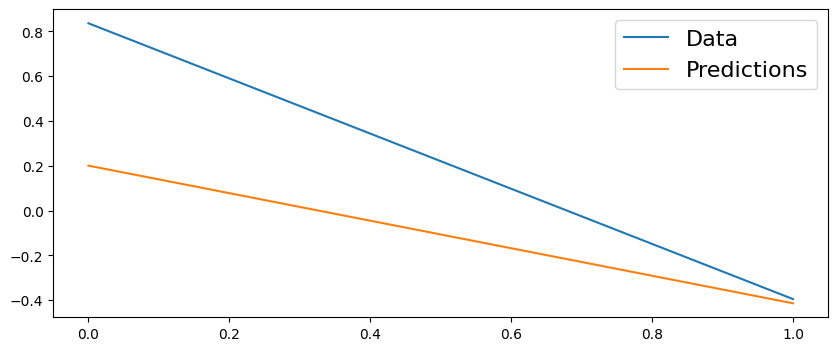

In [78]:
plt.figure(figsize=(10,4))

plt.plot(X[-2:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)